In [4]:
# 1.Load the dataset and display the number of missing values per column.
import pandas as pd 
student = pd.read_csv("C:\\Users\\XNovaQ.23\\Downloads\\student_info.csv")
# print(student.head())
print(student.isnull().sum())


Student_ID        0
Name              0
Department        0
Marks_Math       12
Marks_English    12
Marks_Science    12
Attendance       12
dtype: int64


In [5]:
# 2. Remove rows where more than 2 columns have null values.
import pandas as pd
student = pd.read_csv("C:\\Users\\XNovaQ.23\\Downloads\\student_info.csv")
N = student.shape[1]
there = N-2
student.dropna(thresh=there)# thresh means 
# print(df)
student.isnull().sum()
# df

Student_ID        0
Name              0
Department        0
Marks_Math       12
Marks_English    12
Marks_Science    12
Attendance       12
dtype: int64

In [6]:
# 3. Impute missing marks using:
# Mean for Math
# Median for English
# Mode for Science
import pandas as pd
print("Mean value of Maths :",student['Marks_Math'].mean())
print("Mean value of Englsih :",student['Marks_English'].mean())
print("Mode value of Science :",student['Marks_Science'].mode())

Mean value of Maths : 70.96296296296296
Mean value of Englsih : 68.12037037037037
Mode value of Science : 0    41.0
Name: Marks_Science, dtype: float64


In [7]:
# 4. Create a new column Total_Marks (sum of Math, English, Science).
student['Total'] = student['Marks_Math']+student['Marks_English']+student['Marks_Science']
student


,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance,Total
0,1001,Ganesh,CSE,72.0,87.0,59.0,94.0,218.0
1,1002,Divya,EEE,79.0,40.0,48.0,91.0,167.0
2,1003,Karthik,CSE,78.0,69.0,46.0,88.0,193.0
3,1004,Hema,EEE,57.0,94.0,92.0,63.0,243.0
4,1005,Ekansh,ECE,79.0,75.0,48.0,80.0,202.0
...,...,...,...,...,...,...,...,...
115,1116,Karthik,MECH,83.0,50.0,82.0,77.0,215.0
116,1117,Ekansh,MECH,NaN,47.0,52.0,86.0,NaN
117,1118,Jothi,EEE,69.0,84.0,45.0,90.0,198.0
118,1119,Ganesh,EEE,68.0,NaN,86.0,85.0,NaN


In [8]:
# 5. Create a new column Performance_Level:
# "High" if Total_Marks ≥ 240
# "Medium" if 180–239
# "Low" otherwise
student['Performance Level'] = student['Total'].apply(lambda x: 'High' if x>= 240 else('Medium' if x>=180 else 'low'))
student

,Student_ID,Name,Department,Marks_Math,Marks_English,Marks_Science,Attendance,Total,Performance Level
0,1001,Ganesh,CSE,72.0,87.0,59.0,94.0,218.0,Medium
1,1002,Divya,EEE,79.0,40.0,48.0,91.0,167.0,low
2,1003,Karthik,CSE,78.0,69.0,46.0,88.0,193.0,Medium
3,1004,Hema,EEE,57.0,94.0,92.0,63.0,243.0,High
4,1005,Ekansh,ECE,79.0,75.0,48.0,80.0,202.0,Medium
...,...,...,...,...,...,...,...,...,...
115,1116,Karthik,MECH,83.0,50.0,82.0,77.0,215.0,Medium
116,1117,Ekansh,MECH,NaN,47.0,52.0,86.0,NaN,low
117,1118,Jothi,EEE,69.0,84.0,45.0,90.0,198.0,Medium
118,1119,Ganesh,EEE,68.0,NaN,86.0,85.0,NaN,low


In [9]:
# 6. Find the top 5 students in each department based on Total_Marks. (group by)
student.groupby('Department').apply(lambda x: x.nlargest(5, 'Total')[['Name', 'Total']])

# student.groupby('Department').apply(lambda x: x.nlargest(5['Total'][['Department', 'Name', 'Total']]


C:\Users\XNovaQ.23\AppData\Local\Temp\ipykernel_1896\193677649.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  student.groupby('Department').apply(lambda x: x.nlargest(5, 'Total')[['Name', 'Total']])


Name  Total
Department                    
CIVIL      23   Bhuvana  271.0
           32      Arun  262.0
           58    Ekansh  258.0
           99      Arun  251.0
           92      Hema  231.0
CSE        62     Latha  251.0
           88      Hema  245.0
           59   Bhuvana  236.0
           119    Jothi  229.0
           19   Bhuvana  225.0
ECE        94    Ishaan  262.0
           21     Latha  246.0
           85    Ganesh  243.0
           114     Arun  223.0
           20      Hema  216.0
EEE        46    Ganesh  249.0
           3       Hema  243.0
           44    Ekansh  225.0
           105    Latha  216.0
           26      Arun  212.0
MECH       31    Ishaan  246.0
           108  Karthik  242.0
           12    Ekansh  226.0
           7    Charles  221.0
           115  Karthik  215.0

In [68]:
# 7 .Find departments where average attendance < 75%.
student.groupby('Department')['Attendance'].mean().loc[lambda x: x < 75]


Department
CIVIL    74.533333
CSE      74.000000
ECE      71.846154
Name: Attendance, dtype: float64

In [10]:
# 8. Calculate department-wise correlation between Math, English, and Science scores.
student.groupby('Department')[['Marks_Math', 'Marks_English', 'Marks_Science']].corr().unstack().loc[:, ('Marks_Math',)]

,Marks_Math,Marks_English,Marks_Science
Department,,,
CIVIL,1.0,0.026747,0.261588
CSE,1.0,-0.040957,-0.143364
ECE,1.0,0.094251,-0.111932
EEE,1.0,-0.441906,0.007064
MECH,1.0,-0.127411,-0.245071


In [11]:
# 9. Identify students who scored above 90 in any subject using filtering + any(axis=1).
# student[(student[['Marks_Math', 'Marks_English', 'Marks_Science']] > 90).any(axis=1)]
high_scorers = student[
    (student[['Marks_Math', 'Marks_English', 'Marks_Science']] > 90).any(axis=1) # axis =0 is move downward row axis = 1 move left side
]

high_scorers[['Name', 'Marks_Math', 'Marks_English', 'Marks_Science']]


,Name,Marks_Math,Marks_English,Marks_Science
3,Hema,57.0,94.0,92.0
7,Charles,67.0,63.0,91.0
13,Divya,69.0,94.0,30.0
17,Farah,99.0,66.0,45.0
19,Bhuvana,65.0,67.0,93.0
20,Hema,87.0,37.0,92.0
21,Latha,96.0,52.0,98.0
22,Farah,91.0,59.0,51.0
23,Bhuvana,99.0,76.0,96.0
26,Arun,40.0,92.0,80.0


In [88]:
# 10. Detect outliers in Science marks using the IQR method.
Q1 = student['Marks_Science'].quantile(0.25)
Q3 = student['Marks_Science'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers_science = student[
    (student['Marks_Science'] < lower_limit) | 
    (student['Marks_Science'] > upper_limit)
]

print("Outliers in Science Marks:")
outliers_science[['Name', 'Marks_Science']]


Outliers in Science Marks:


,Name,Marks_Science


In [12]:
# 11. Create a pivot table showing max, min, mean of all 3 subjects for each department.
student.pivot_table(
    values=['Marks_Math', 'Marks_English', 'Marks_Science'],
    index='Department',
    aggfunc=['max', 'min', 'mean']
).unstack()


                     Department
max   Marks_English  CIVIL         94.000000
                     CSE           92.000000
                     ECE           94.000000
                     EEE           94.000000
                     MECH          92.000000
      Marks_Math     CIVIL         99.000000
                     CSE           94.000000
                     ECE           99.000000
                     EEE           95.000000
                     MECH          99.000000
      Marks_Science  CIVIL         98.000000
                     CSE           97.000000
                     ECE           98.000000
                     EEE           98.000000
                     MECH          98.000000
min   Marks_English  CIVIL         37.000000
                     CSE           38.000000
                     ECE           36.000000
                     EEE           40.000000
                     MECH          35.000000
      Marks_Math     CIVIL         44.000000
                     CS

In [17]:
# 12. Replace null values in Attendance with random values (50–90).
import pandas as pd
import random
import numpy as np
mask = student['Attendance'].isna()
student.loc[mask,'Attendance'] = np.random.randint(50, 91, mask.sum())


In [19]:
# 13. Sort students by:
# Department
# Descending Total_Marks
df = student.sort_values(['Department','Total'], ascending = [True,False])


In [20]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 15.2 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 18.3 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------------------------------------- - 6.8/7.0 MB 46.5 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 30.8 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------

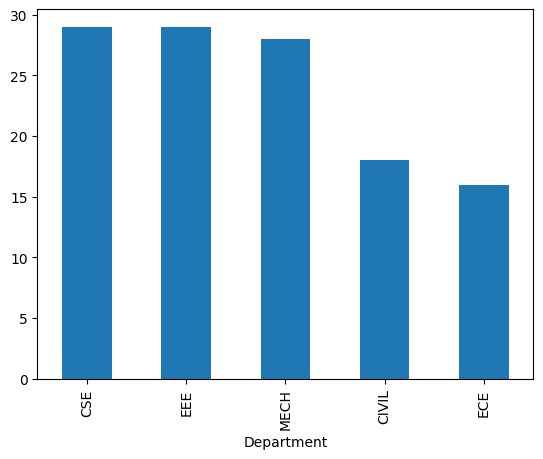

In [24]:
# 14. Plot (students count vs. department) using Pandas.
import matplotlib.pyplot as plot
student['Department'].value_counts().plot(kind='bar')
plot.show()

In [22]:
# 15. Export the cleaned DataFrame to a new CSV named student_file.csv
export = student.to_csv("student_file.csv", index =False)
print(export)

None
